In [17]:
import json

dataset = []
with open("mohit_dataset.jsonl", "r") as f:
  for line in f:
    dataset.append(json.loads(line))

queries = [data['query'] for data in dataset]
codes = [data['code'] for data in dataset]

### dependencies
- bertopic
- sentence-transformers
- transformers
- umap-learn
- hdbscan
- sklearn
- matplotlib
- numpy

In [18]:
from sentence_transformers import SentenceTransformer
import numpy as np

query_model = SentenceTransformer("all-MiniLM-L6-v2")
code_model  = SentenceTransformer("microsoft/codebert-base")

query_embeddings = query_model.encode(queries, show_progress_bar=True)
code_embeddings  = code_model.encode(codes, show_progress_bar=True)

embeddings = np.hstack((query_embeddings, code_embeddings))

No sentence-transformers model found with name microsoft/codebert-base. Creating a new one with mean pooling.


Batches:   0%|          | 0/36 [00:00<?, ?it/s]

Batches:   0%|          | 0/36 [00:00<?, ?it/s]

In [35]:
from bertopic import BERTopic
texts = [f"{q} {c}" for q, c in zip(queries, codes)]
from umap import UMAP
umap_model = UMAP(n_neighbors=15, n_components=5, metric='cosine', random_state=42, verbose=True)
from hdbscan import HDBSCAN
# hdbscan_model = HDBSCAN(min_cluster_size=13, metric='euclidean', prediction_data=True)
hdbscan_model = HDBSCAN(metric='euclidean', prediction_data=True)
variable_topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model, calculate_probabilities=True, verbose=True)
variable_topics, variable_probs = variable_topic_model.fit_transform(texts, embeddings)

2025-05-28 01:39:53,286 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


UMAP(angular_rp_forest=True, metric='cosine', n_components=5, n_jobs=1, random_state=42, verbose=True)
Wed May 28 01:39:53 2025 Construct fuzzy simplicial set
Wed May 28 01:39:54 2025 Finding Nearest Neighbors
Wed May 28 01:39:54 2025 Finished Nearest Neighbor Search
Wed May 28 01:39:54 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


2025-05-28 01:39:57,001 - BERTopic - Dimensionality - Completed ✓
2025-05-28 01:39:57,002 - BERTopic - Cluster - Start clustering the reduced embeddings


Wed May 28 01:39:56 2025 Finished embedding


2025-05-28 01:39:57,270 - BERTopic - Cluster - Completed ✓
2025-05-28 01:39:57,274 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-28 01:39:57,379 - BERTopic - Representation - Completed ✓


In [38]:
import pandas as pd
variable_info = pd.DataFrame(variable_topic_model.get_topic_info())
print(variable_info['Topic'].unique())
variable_info.head()

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]


,Topic,Count,Name,Representation,Representative_Docs
0,-1,189,-1_def_this_to_return,"[def, this, to, return, if, code, in, the, imp...",[This Python code creates a web server that ha...
1,0,49,0_assert_test_returns_function,"[assert, test, returns, function, radius, is, ...",[Test a function that checks if a number is ev...
2,1,41,1_users_sqlite3connectmydatabasedb_cursor_table,"[users, sqlite3connectmydatabasedb, cursor, ta...",[Orders users by their age in descending order...
3,2,37,2_socketsocketsocketafinet_socket_socketsockst...,"[socketsocketsocketafinet, socket, socketsocks...",[Build a UDP server that receives messages and...
4,3,34,3_list_of_dataset_removeduplicates1,"[list, of, dataset, removeduplicates1, mean1, ...",[Determine the standard deviation of a dataset...


In [39]:
from typing import List

variable_all_topics: List[int] = list(map(int, list(variable_topic_model.get_topics().keys())))
if -1 in variable_all_topics:
  variable_all_topics.remove(-1)

In [40]:
fig = variable_topic_model.visualize_barchart(topics=variable_all_topics, top_n_topics=3)

In [34]:
fig = variable_topic_model.visualize_hierarchy()

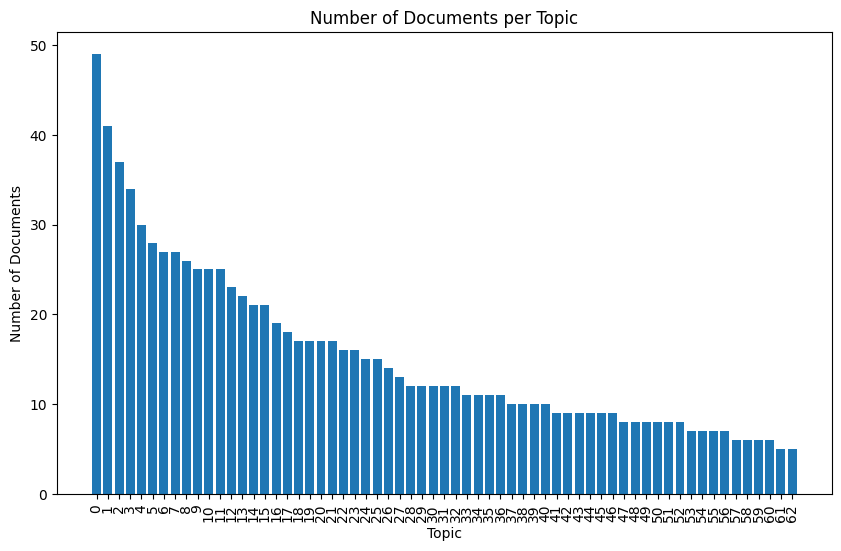

In [41]:
import matplotlib.pyplot as plt
variable_info = variable_topic_model.get_topic_info()
variable_info = variable_info[variable_info.Topic != -1]
plt.figure(figsize=(10, 6))
plt.bar(variable_info.Topic.astype(str), variable_info.Count)
plt.xlabel("Topic")
plt.ylabel("Number of Documents")
plt.title("Number of Documents per Topic")
plt.xticks(rotation=90)
plt.show()

In [42]:
plt = variable_topic_model.visualize_heatmap()
plt.update_xaxes(tickangle=90)
plt.show()

In [44]:
from sklearn.cluster import KMeans
from bertopic import BERTopic
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
embeddings = pca.fit_transform(embeddings)
kmeans_model = KMeans(n_clusters=12, random_state=42)
labels = kmeans_model.fit_predict(embeddings)
constant_topic_model = BERTopic(calculate_probabilities=True, verbose=True, nr_topics=12)
constant_topic_model.fit(texts, embeddings, y=labels)

2025-05-28 01:40:31,750 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-28 01:40:37,074 - BERTopic - Dimensionality - Completed ✓
2025-05-28 01:40:37,077 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-28 01:40:37,300 - BERTopic - Cluster - Completed ✓
2025-05-28 01:40:37,301 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-05-28 01:40:37,384 - BERTopic - Representation - Completed ✓
2025-05-28 01:40:37,385 - BERTopic - Topic reduction - Reducing number of topics
2025-05-28 01:40:37,393 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-28 01:40:37,472 - BERTopic - Representation - Completed ✓
2025-05-28 01:40:37,475 - BERTopic - Topic reduction - Reduced number of topics from 25 to 12


In [45]:
import pandas as pd
info = pd.DataFrame(constant_topic_model.get_topic_info())
print(info['Topic'].unique())
info.head()

[-1  0  1  2  3  4  5  6  7  8  9 10]


,Topic,Count,Name,Representation,Representative_Docs
0,-1,16,-1_original_celsius_count_factor,"[original, celsius, count, factor, the, given,...",[Demonstrate polymorphism by creating a generi...
1,0,185,0_the_assert_test_function,"[the, assert, test, function, customers, that,...",[Write a unit test to check if a function retu...
2,1,167,1_return_image_of_the,"[return, image, of, the, def, to, code, this, ...",[This code calculates the mean of a list of nu...
3,2,130,2_httpserver_selfendheaders_selfsendresponse20...,"[httpserver, selfendheaders, selfsendresponse2...",[This code demonstrates how to create a simple...
4,3,118,3_users_file_cursor_the,"[users, file, cursor, the, table, fileclose, f...",[Retrieve the first 3 users from the 'users' t...


In [46]:
constant_all_topics = list(map(int,list(constant_topic_model.get_topics().keys())))
if -1 in constant_all_topics:
  constant_all_topics.remove(-1)

In [ ]:
fig = constant_topic_model.visualize_barchart(top_n_topics=None, topics=constant_all_topics)

In [ ]:
fig = constant_topic_model.visualize_hierarchy()

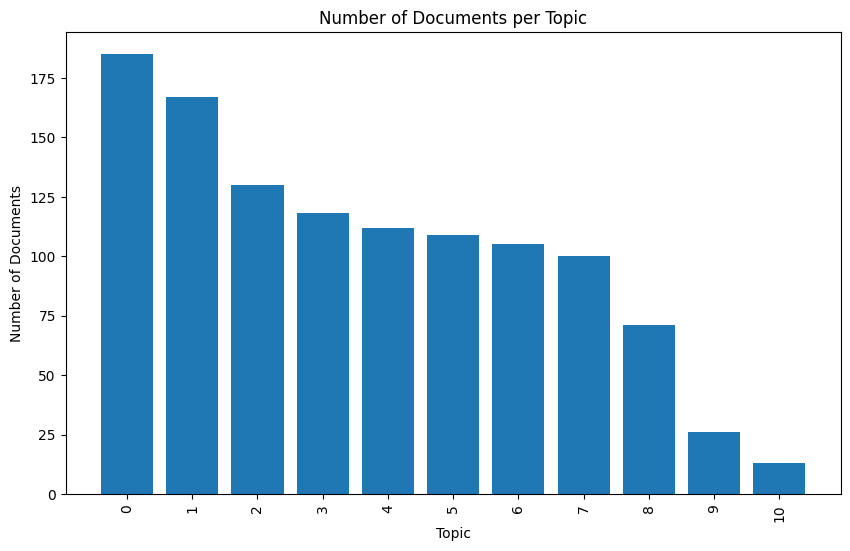

In [48]:
import matplotlib.pyplot as plt
constant_info = constant_topic_model.get_topic_info()
constant_info = constant_info[constant_info.Topic != -1]
plt.figure(figsize=(10, 6))
plt.bar(constant_info.Topic.astype(str), constant_info.Count)
plt.xlabel("Topic")
plt.ylabel("Number of Documents")
plt.title("Number of Documents per Topic")
plt.xticks(rotation=90)
plt.show()

In [49]:
fig = constant_topic_model.visualize_heatmap()
fig.update_xaxes(tickangle=90)  
fig.show()